# SMOTE-based Techniques for SVM
This transcript outlines the process of balancing a machine learning dataset for quasar classification using a constructed and provided combined features file to obtain benchmark results.

Here, we experimented with the Support Vector Machine classifier (SVM), implementing different types of SMOTE-based algorithms that are commonly used today to address class imbalance by augmenting the minority class, improving model performance on imbalanced datasets. We adopted the following 
                    
                    1) SVMSMOTE; 2) SMOTEENN; 3) BorderLineSMOTE; and 4) ADASYN 

The steps involved: 
1. Merging and preprocessing the combined features file, including handling missing and infinite values.
2. Encoding the target labels and scaling the features.
3. Using the algorithm to address class imbalance by oversampling minority classes and undersampling noisy majority classes.
4. Splitting the balanced data into training and testing sets.
5. Training the SVM on the balanced dataset and evaluating its performance using classification metrics and confusion matrix visualization.

# Step 1: Importing necessary libraries 
First, we install and import necessary packages and libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SVMSMOTE
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import GridSearchCV


# Step 2: Load and Merge Datasets
After installing and importing all the necessary packages, we extracted the data for this project consisting of two separate files: gr_features_by_object.csv and new_features.csv. These datasets are then merged into a single Data Frame based on the name column. After merging, rows are filtered to retain only the relevant classes (Q, QR, QX), which represent the target labels for classification.

In [2]:
# load original and new features file
original_features = pd.read_csv('gr_features_by_object.csv')
new_features = pd.read_csv('new_features.csv')

# merge features
features = original_features.merge(new_features, on='name', how='inner')
del original_features, new_features

# define feature type
features = features[features['type'].isin(['Q', 'QR', 'QX'])]

# Step 3: Checking and Handling Missing Values
To ensure data quality, missing values are identified and addressed. The script first calculates the number of missing values for each column. Rows with missing values in critical columns (f_var_r, f_var_g, mhps_high_r, mhps_ratio_r) are dropped to maintain data integrity. Remaining columns are also checked to ensure no missing values persist.

In [3]:
# drop missing values
features.dropna(subset=["f_var_r", "f_var_g", "mhps_high_r", "mhps_ratio_r"], inplace=True)

# Step 4: Encode Target Labels
The target variable (type) is categorical and needs to be converted into numerical format for model compatibility. The LabelEncoder is used to map each class (Q, QR, QX) to a unique integer value.

In [4]:
X = features.drop(columns=['type', 'name'])
y = features['type']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 5: Standardizing and Imputing Features
Feature values are standardized using StandardScaler to normalize them to a common scale, which is crucial for algorithms like SVM. Missing values in the features are replaced with the column-wise mean using SimpleImputer.

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


After the pre-processing, we integrated 4 SMOTE techniques in the following ways to handle imbalanced data and optimize the SVM model. It Includes all plots, confusion matrices, and benchmark metrics:

# (I) SVMSMOTE

In [6]:
# Apply SVMSMOTE to balance the dataset
svmsmote = SVMSMOTE(random_state=42)
X_resampled_svmsmote, y_resampled_svmsmote = svmsmote.fit_resample(X_scaled, y_encoded)

# Check the class distribution
print("Original class distribution:", Counter(y_encoded))
print("Resampled class distribution:", Counter(y_resampled_svmsmote))

Original class distribution: Counter({0: 18722, 2: 2373, 1: 1224})
Resampled class distribution: Counter({2: 18722, 0: 18722, 1: 10847})


In [7]:
# Split Data into Training and Testing Sets
X_train_svmsmote, X_test_svmsmote, y_train_svmsmote, y_test_svmsmote = train_test_split(
    X_resampled_svmsmote, y_resampled_svmsmote, test_size=0.2, stratify=y_resampled_svmsmote, random_state=42
)
print("Training set size:", X_train_svmsmote.shape)
print("Test set size:", X_test_svmsmote.shape)

Training set size: (38632, 115)
Test set size: (9659, 115)


In [8]:
# Standardize features
scaler = StandardScaler()
X_train_svmsmote = scaler.fit_transform(X_train_svmsmote)
X_test_svmsmote = scaler.transform(X_test_svmsmote)

In [9]:
# Train the SVM Classifier
svc = SVC(kernel="rbf", class_weight="balanced", random_state=42)

# Fit the model on the training data
svc.fit(X_train_svmsmote, y_train_svmsmote)

# Print a confirmation message after training
print("SVM classifier trained successfully.")

SVM classifier trained successfully.


In [10]:
# Retrieve the original class labels from the label encoder
str_labels = label_encoder.classes_

# Predict labels for the test set using the trained SVM model
y_pred_svmsmote = svc.predict(X_test_svmsmote)

Accuracy score: 0.8077
F1 score: [0.79458122 0.80730897 0.82285714]

Classification Report (SVMSMOTE):
              precision    recall  f1-score   support

           Q       0.78      0.81      0.79      3745
          QR       0.73      0.90      0.81      2169
          QX       0.91      0.75      0.82      3745

    accuracy                           0.81      9659
   macro avg       0.81      0.82      0.81      9659
weighted avg       0.82      0.81      0.81      9659



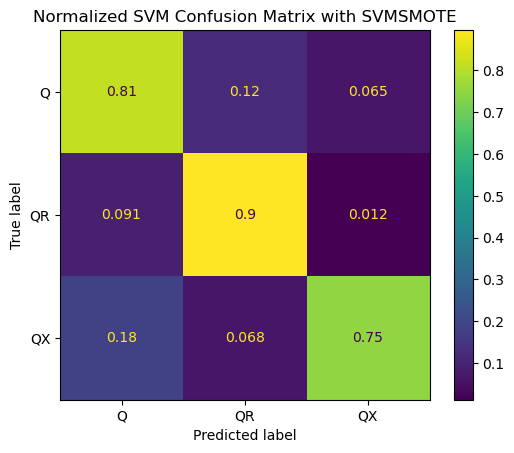

In [11]:
# Compute the confusion matrix
cm_svmsmote = confusion_matrix(y_test_svmsmote, y_pred_svmsmote)

# Print evaluation metrics
print(f"Accuracy score: {accuracy_score(y_test_svmsmote, y_pred_svmsmote):.4f}")
print(f"F1 score: {f1_score(y_test_svmsmote, y_pred_svmsmote, average=None)}")
print("\nClassification Report (SVMSMOTE):")
print(classification_report(y_test_svmsmote, y_pred_svmsmote, target_names=label_encoder.classes_))

# Normalize the confusion matrix
cm_svmsmote_normalized = cm_svmsmote.astype('float') / cm_svmsmote.sum(axis=1, keepdims=True)

# Display the normalized confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm_svmsmote_normalized, display_labels=label_encoder.classes_).plot(cmap=plt.cm.viridis)
plt.title("Normalized SVM Confusion Matrix with SVMSMOTE")
plt.show()

# (II) SMOTEENN

In [12]:
# Apply SMOTEENN to balance the dataset
smoteenn = SMOTEENN(random_state=42)
X_resampled_smoteenn, y_resampled_smoteenn = smoteenn.fit_resample(X_scaled, y_encoded)

# Check the class distribution
print("Original class distribution:", Counter(y_encoded))
print("Resampled class distribution (SMOTEENN):", Counter(y_resampled_smoteenn))

Original class distribution: Counter({0: 18722, 2: 2373, 1: 1224})
Resampled class distribution (SMOTEENN): Counter({1: 18700, 2: 18644, 0: 3027})


In [13]:
# Split the resampled data
X_train_smoteenn, X_test_smoteenn, y_train_smoteenn, y_test_smoteenn = train_test_split(
    X_resampled_smoteenn, y_resampled_smoteenn, test_size=0.2, stratify=y_resampled_smoteenn, random_state=42
)
print("Training set size:", X_train_smoteenn.shape)
print("Test set size:", X_test_smoteenn.shape)

Training set size: (38632, 115)
Test set size: (9659, 115)


In [14]:
# Standardize features
scaler = StandardScaler()
X_train_smoteenn = scaler.fit_transform(X_train_smoteenn)
X_test_smoteenn = scaler.transform(X_test_smoteenn)

In [15]:
# Train the SVM Classifier
svc = SVC(kernel="rbf", class_weight="balanced", random_state=42)

# Fit the model on the training data
svc.fit(X_train_smoteenn, y_train_smoteenn)

# Print a confirmation message after training
print("SVM classifier trained successfully.")

SVM classifier trained successfully.


In [16]:
# Retrieve the original class labels from the label encoder
str_labels = label_encoder.classes_

# Predict labels for the test set using the trained SVM model
y_pred_smoteenn = svc.predict(X_test_smoteenn)

Accuracy score: 0.8625
F1 score: [0.62798635 0.89593841 0.87540204]

Classification Report (SMOTEENN):
              precision    recall  f1-score   support

           Q       0.54      0.76      0.63       606
          QR       0.89      0.90      0.90      3740
          QX       0.91      0.84      0.88      3729

    accuracy                           0.86      8075
   macro avg       0.78      0.83      0.80      8075
weighted avg       0.87      0.86      0.87      8075



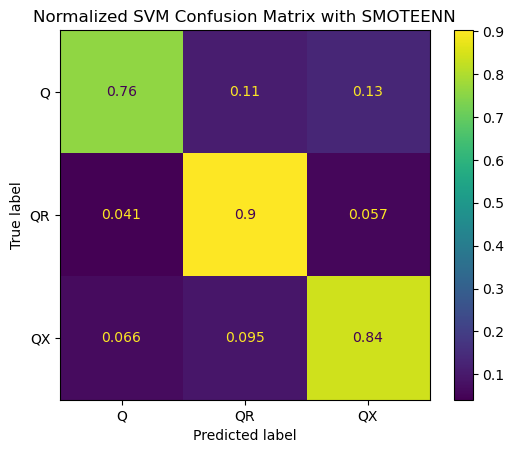

In [17]:
# Compute the confusion matrix
cm_smoteenn = confusion_matrix(y_test_smoteenn, y_pred_smoteenn)

# Print evaluation metrics
print(f"Accuracy score: {accuracy_score(y_test_smoteenn, y_pred_smoteenn):.4f}")
print(f"F1 score: {f1_score(y_test_smoteenn, y_pred_smoteenn, average=None)}")
print("\nClassification Report (SMOTEENN):")
print(classification_report(y_test_smoteenn, y_pred_smoteenn, target_names=label_encoder.classes_))

# Normalize the confusion matrix
cm_smoteenn_normalized = cm_smoteenn.astype('float') / cm_smoteenn.sum(axis=1, keepdims=True)

# Display the normalized confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm_smoteenn_normalized, display_labels=label_encoder.classes_).plot(cmap=plt.cm.viridis)
plt.title("Normalized SVM Confusion Matrix with SMOTEENN")
plt.show()

# (III) BorderlineSMOTE

In [18]:
# Apply BorderlineSMOTE to balance the dataset
borderline_smote = BorderlineSMOTE(random_state=42, kind='borderline-1')  # You can use 'borderline-1' or 'borderline-2'
X_resampled_borderline, y_resampled_borderline = borderline_smote.fit_resample(X_scaled, y_encoded)

# Check class distribution before and after BorderlineSMOTE
print("Original class distribution:", Counter(y_encoded))
print("Resampled class distribution with BorderlineSMOTE:", Counter(y_resampled_borderline))

Original class distribution: Counter({0: 18722, 2: 2373, 1: 1224})
Resampled class distribution with BorderlineSMOTE: Counter({2: 18722, 0: 18722, 1: 18722})


In [19]:
# Split the resampled data
X_train_borderline, X_test_borderline, y_train_borderline, y_test_borderline = train_test_split(
    X_resampled_borderline, y_resampled_borderline, test_size=0.2, stratify=y_resampled_borderline, random_state=42
)
print("Training set size:", X_train_borderline.shape)
print("Test set size:", X_test_borderline.shape)

Training set size: (44932, 115)
Test set size: (11234, 115)


In [20]:
# Standardize features
scaler = StandardScaler()
X_train_borderline = scaler.fit_transform(X_train_borderline)
X_test_borderline = scaler.transform(X_test_borderline)

In [21]:
# Train the SVM Classifier
svc = SVC(kernel="rbf", class_weight="balanced", random_state=42)

# Fit the model on the training data
svc.fit(X_train_borderline, y_train_borderline)

# Print a confirmation message after training
print("SVM classifier trained successfully.")

SVM classifier trained successfully.


In [22]:
# Retrieve the original class labels from the label encoder
str_labels = label_encoder.classes_

# Predict labels for the test set using the trained SVM model
y_pred_borderline = svc.predict(X_test_borderline)

Accuracy score: 0.8469
F1 score: [0.79554517 0.9017371  0.840262  ]

Classification Report (BorderlineSMOTE):
              precision    recall  f1-score   support

           Q       0.82      0.77      0.80      3744
          QR       0.88      0.93      0.90      3745
          QX       0.84      0.84      0.84      3745

    accuracy                           0.85     11234
   macro avg       0.85      0.85      0.85     11234
weighted avg       0.85      0.85      0.85     11234



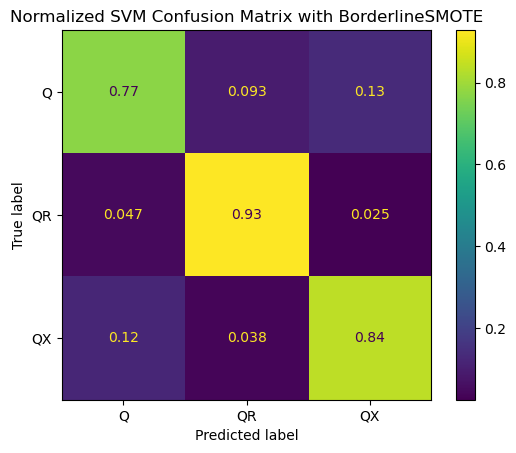

In [23]:
# Compute the confusion matrix
cm_borderline = confusion_matrix(y_test_borderline, y_pred_borderline)

# Print evaluation metrics
print(f"Accuracy score: {accuracy_score(y_test_borderline, y_pred_borderline):.4f}")
print(f"F1 score: {f1_score(y_test_borderline, y_pred_borderline, average=None)}")
print("\nClassification Report (BorderlineSMOTE):")
print(classification_report(y_test_borderline, y_pred_borderline, target_names=label_encoder.classes_))

# Normalize the confusion matrix
cm_borderline_normalized = cm_borderline.astype('float') / cm_borderline.sum(axis=1, keepdims=True)

# Display the normalized confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm_borderline_normalized, display_labels=label_encoder.classes_).plot(cmap=plt.cm.viridis)
plt.title("Normalized SVM Confusion Matrix with BorderlineSMOTE")
plt.show()

# (IV) ADASYN

In [24]:
# Apply ADASYN to balance the dataset
adasyn = ADASYN(random_state=42)
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_scaled, y_encoded)

# Display class distributions before and after ADASYN
print("Original class distribution:", Counter(y_encoded))
print("Resampled class distribution with ADASYN:", Counter(y_resampled_adasyn))

Original class distribution: Counter({0: 18722, 2: 2373, 1: 1224})
Resampled class distribution with ADASYN: Counter({0: 18722, 2: 18548, 1: 18426})


In [25]:
# Split the resampled data
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(
    X_resampled_adasyn, y_resampled_adasyn, test_size=0.2, stratify=y_resampled_adasyn, random_state=42
)
print("Training set size:", X_train_adasyn.shape)
print("Test set size:", X_test_adasyn.shape)

Training set size: (44556, 115)
Test set size: (11140, 115)


In [26]:
# Standardize features
scaler = StandardScaler()
X_train_adasyn = scaler.fit_transform(X_train_adasyn)
X_test_adasyn = scaler.transform(X_test_adasyn)

In [27]:
# Train the SVM Classifier
svc = SVC(kernel="rbf", class_weight="balanced", random_state=42)

# Fit the model on the training data
svc.fit(X_train_adasyn, y_train_adasyn)

# Print a confirmation message after training
print("SVM classifier trained successfully.")

SVM classifier trained successfully.


In [28]:
# Retrieve the original class labels from the label encoder
str_labels = label_encoder.classes_

# Predict labels for the test set using the trained SVM model
y_pred_adasyn = svc.predict(X_test_adasyn)

Accuracy score: 0.8032
F1 score: [0.75106807 0.85475363 0.79866399]

Classification Report (ADASYN):
              precision    recall  f1-score   support

           Q       0.80      0.70      0.75      3745
          QR       0.81      0.90      0.85      3685
          QX       0.79      0.81      0.80      3710

    accuracy                           0.80     11140
   macro avg       0.80      0.80      0.80     11140
weighted avg       0.80      0.80      0.80     11140



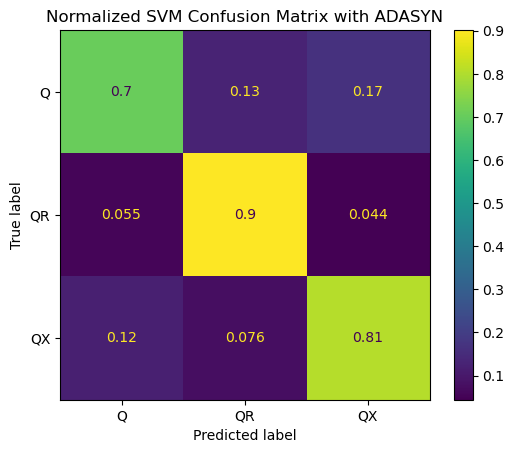

In [30]:
# Compute the confusion matrix
cm_adasyn = confusion_matrix(y_test_adasyn, y_pred_adasyn)

# Print evaluation metrics
print(f"Accuracy score: {accuracy_score(y_test_adasyn, y_pred_adasyn):.4f}")
print(f"F1 score: {f1_score(y_test_adasyn, y_pred_adasyn, average=None)}")
print("\nClassification Report (ADASYN):")
print(classification_report(y_test_adasyn, y_pred_adasyn, target_names=label_encoder.classes_))

# Normalize the confusion matrix
cm_adasyn_normalized = cm_adasyn.astype('float') / cm_adasyn.sum(axis=1, keepdims=True)

# Display the normalized confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm_adasyn_normalized, display_labels=label_encoder.classes_).plot(cmap=plt.cm.viridis)
plt.title("Normalized SVM Confusion Matrix with ADASYN")
plt.show()

# SVM Without Balancing 

This evaluation examines the performance of an SVM classifier trained on an imbalanced dataset without applying balancing techniques. It provides a baseline to understand how the model naturally handles imbalanced data, which often leads to bias toward majority classes. The results highlight the need for balancing strategies when addressing class imbalance in real-world scenarios.

(17855, 115)

(4464, 115)

Accuracy score: 0.8401
F1 score: [0.91305407 0.         0.00421053]

Classification Report:
              precision    recall  f1-score   support

           Q       0.84      1.00      0.91      3749
          QR       0.00      0.00      0.00       241
          QX       1.00      0.00      0.00       474

    accuracy                           0.84      4464
   macro avg       0.61      0.33      0.31      4464
weighted avg       0.81      0.84      0.77      4464



/home/nandita/.conda/envs/PSC/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nandita/.conda/envs/PSC/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nandita/.conda/envs/PSC/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

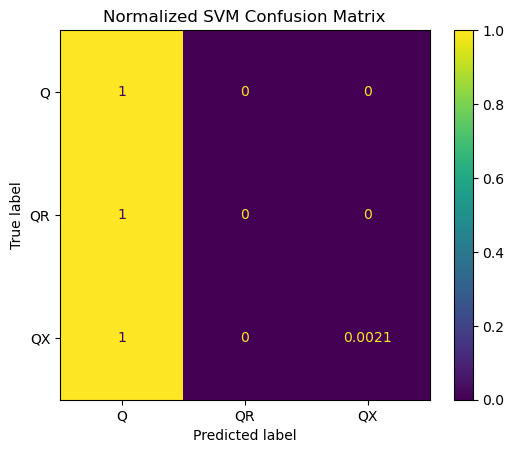

In [33]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)
display(X_train.shape, X_test.shape)

# Train the SVM Classifier without balancing
svc = SVC(kernel="rbf", random_state=42)
svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svc.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 score: {f1_score(y_test, y_pred, average=None)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)

# Display the normalized confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=label_encoder.classes_).plot(cmap=plt.cm.viridis)
plt.title("Normalized SVM Confusion Matrix")
plt.show()

# More Advance with SMOTEENN
Since we got best result with SVM+SMOTEENN, now try to go further, checking hyper-parameters for SVM to find out the best fit for our data.

## 1. Hyperparameter Tuning

In [ ]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

# Perform Grid Search
grid = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='f1_macro', verbose=2)
grid.fit(X_train_smoteenn, y_train_smoteenn)

# Best parameters and evaluation
print(f"Best Parameters: {grid.best_params_}")
best_svc = grid.best_estimator_
print(f"Test Set Accuracy: {best_svc.score(X_test_smoteenn, y_test_smoteenn):.4f}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time= 5.5min
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time= 5.5min
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time= 6.5min
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time= 6.7min
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time= 6.7min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 6.1min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 6.4min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 6.3min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 6.4min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 6.2min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=10.6min
[CV] END .......................C=0.1, gamma=0.1

## 2. Evaluate with Advanced Metrics

In [43]:
# Train the SVM Classifier with Best Parameters
svc_best = SVC(kernel="rbf", C=100, gamma=0.01, class_weight="balanced", random_state=42, probability=True)

# Fit the model on the training data (SMOTEENN balanced)
svc_best.fit(X_train_smoteenn, y_train_smoteenn)

# Print a confirmation message after training
print("SVM classifier trained successfully with the best parameters.")

SVM classifier trained successfully with the best parameters.


In [44]:
# Retrieve the original class labels from the label encoder
str_labels = label_encoder.classes_

# Predict labels for the test set using the trained SVM model
y_pred_smoteenn = svc_best.predict(X_test_smoteenn)

Accuracy score: 0.9744
F1 score: [0.80956938 0.98939836 0.98214049]

Classification Report (SMOTEENN):
              precision    recall  f1-score   support

           Q       0.96      0.70      0.81       606
          QR       0.98      1.00      0.99      3740
          QX       0.97      1.00      0.98      3729

    accuracy                           0.97      8075
   macro avg       0.97      0.90      0.93      8075
weighted avg       0.97      0.97      0.97      8075



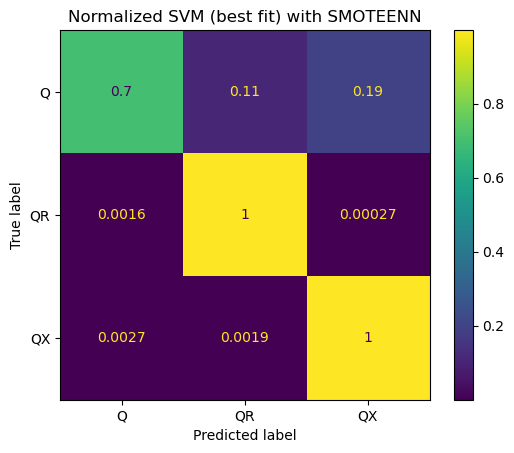

In [45]:
# Compute the confusion matrix
cm_smoteenn = confusion_matrix(y_test_smoteenn, y_pred_smoteenn)

# Print evaluation metrics
print(f"Accuracy score: {accuracy_score(y_test_smoteenn, y_pred_smoteenn):.4f}")
print(f"F1 score: {f1_score(y_test_smoteenn, y_pred_smoteenn, average=None)}")
print("\nClassification Report (SMOTEENN):")
print(classification_report(y_test_smoteenn, y_pred_smoteenn, target_names=label_encoder.classes_))

# Normalize the confusion matrix
cm_smoteenn_normalized = cm_smoteenn.astype('float') / cm_smoteenn.sum(axis=1, keepdims=True)

# Display the normalized confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm_smoteenn_normalized, display_labels=label_encoder.classes_).plot(cmap=plt.cm.viridis)
plt.title("Normalized SVM (best fit) with SMOTEENN")
plt.show()